Student name(s): Nolan Stelzner

You can work in pairs for assignments in DSC 522.

# Car Evaluation 


Car evaluation dataset is an very old dataset created for testing machine learning algorithms.

The official dataset decription:
 
 

1. Title: Car Evaluation Database

2. Sources:

   (a) Creator: Marko Bohanec
   
   (b) Donors: 
   Marko Bohanec   (marko.bohanec@ijs.si)
   Blaz Zupan      (blaz.zupan@ijs.si)
   
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:

   CAR:                      car acceptability
   - PRICE:                  overall price
       - buying:               buying price
       - maint:                price of the maintenance
   - TECH:                   technical characteristics
       - COMFORT:              comfort
       - doors:              number of doors
       - persons:            capacity in terms of persons to carry
       - lug_boot:           the size of luggage boot
       - safety:               estimated safety of the car

   Input attributes are printed in lowercase. Besides the target
   concept (CAR), the model includes three intermediate concepts:
   PRICE, TECH, COMFORT. Every concept is in the original model
   related to its lower level descendants by a set of examples (for
   these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

   The Car Evaluation Database contains examples with the structural
   information removed, i.e., directly relates CAR to the six input
   attributes: buying, maint, doors, persons, lug_boot, safety.

   Because of known underlying concept structure, this database may be
   particularly useful for testing constructive induction and
   structure discovery methods.

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:

   - buying:       v-high, high, med, low
   - maint:        v-high, high, med, low
   - doors:        2, 3, 4, 5-more
   - persons:      2, 4, more
   - lug_boot:     small, med, big
   - safety:       low, med, high

8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)

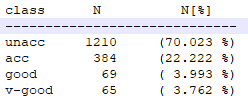

In [8]:
# Common imports
import numpy as np
import os
import pandas as pd

In [9]:
df = pd.read_csv('datasets/car.data', names=['buying','maint','doors','persons','lug_boot','safety','class'])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# Preprocess the data

Please read the introduction of the dataset. There are categorical columns. Please find a reasonable approach to convert them into numerical features for the first machine learning model - *Naive Bayes*.

Justify your decision in handling those categorical feature below:


<font color='red'> The categorical features in each column should be converted to one single column of numerical feature. for example original values in doors column are [2, 4, 5more]. We can turn them to [2,4,5]</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,med,med,unacc
freq,432,432,432,576,576,576,1210


In [5]:
# do this for all the column (except class, of course) to get the idea on the distinct values in each column
df.doors.value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [19]:
df.persons.value_counts()

5    576
4    576
2    576
Name: persons, dtype: int64

In [16]:
# Use the dictionary below and apply the mapping from categorical feature to numbers 
mymap1 = {'low':1,'small':1,'med':2,'high':3,'big':3,'vhigh':4,'more':5,'5more':5}
df = df.applymap(lambda s: mymap1.get(s) if s in mymap1 else s)
# Your dataframe should have all numbers except the "class" column
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [17]:
# list of dtypes to include 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   int64 
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   int64 
 5   safety    1728 non-null   int64 
 6   class     1728 non-null   object
dtypes: int64(4), object(3)
memory usage: 94.6+ KB


In [20]:
X = df.drop('class',axis=1)
y = df['class']

# Train-test split
Please make a train-test split on the processed dataset. Hold 20% or testing purpose. Use random_state 101.

Use the **class** as the label you are predicting.


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=101)

# Bayes model
Create a Naive Bayes model and make a prediction with it on the testing dataset. Make the classification report and confusion_matrix.

In [23]:
from sklearn.naive_bayes import GaussianNB

model = model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [25]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         acc       0.47      0.37      0.42        70
        good       0.17      0.08      0.11        13
       unacc       0.92      0.88      0.90       252
       vgood       0.26      1.00      0.41        11

    accuracy                           0.75       346
   macro avg       0.45      0.58      0.46       346
weighted avg       0.78      0.75      0.76       346



In [12]:
# make a prediction and show the classification report
predictions = 
from sklearn.metrics import classification_report,confusion_matrix
__________________________________

              precision    recall  f1-score   support

         acc       0.47      0.37      0.42        70
        good       0.17      0.08      0.11        13
       unacc       0.92      0.88      0.90       252
       vgood       0.26      1.00      0.41        11

    accuracy                           0.75       346
   macro avg       0.45      0.58      0.46       346
weighted avg       0.78      0.75      0.76       346



In [26]:
print(confusion_matrix(y_test,predictions))

[[ 26   4  16  24]
 [  6   1   4   2]
 [ 23   1 222   6]
 [  0   0   0  11]]


In [13]:
# show the confusion matrix
__________________________________

[[ 26   4  16  24]
 [  6   1   4   2]
 [ 23   1 222   6]
 [  0   0   0  11]]


# Preprocess data again (?) for decision tree

Do you want to use the data you have processed for the Naive Bayse for the next model, *decision tree*?

Why or why not?

<font color='red'> I went ahead and kept the same processed data from above for the decision tree since in sklearn it does not handle categorical data well. </font>


If you decide that you want to process your data in a different way than you have done for the Naive Bayes, do the data processing below.

You also need to redo the train-test split if you process the data differently. Again, hold 20% or testing purpose. Use random_state 101.

# Decision tree model

Create a decision tree model and make prediction with it on the test dataset.

Make the classification report and confusion_matrix.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         acc       0.95      0.99      0.97        70
        good       0.92      0.85      0.88        13
       unacc       1.00      0.99      0.99       252
       vgood       0.92      1.00      0.96        11

    accuracy                           0.98       346
   macro avg       0.94      0.95      0.95       346
weighted avg       0.98      0.98      0.98       346

[[ 69   0   0   1]
 [  2  11   0   0]
 [  2   1 249   0]
 [  0   0   0  11]]


In [14]:
#Example Answer - I like the numbers above more.

              precision    recall  f1-score   support

         acc       0.94      0.97      0.96        70
        good       0.83      0.77      0.80        13
       unacc       1.00      0.99      0.99       252
       vgood       0.85      1.00      0.92        11

    accuracy                           0.98       346
   macro avg       0.91      0.93      0.92       346
weighted avg       0.98      0.98      0.98       346

[[ 68   1   0   1]
 [  2  10   0   1]
 [  2   1 249   0]
 [  0   0   0  11]]
